In [1]:
import pandas as pd
import numpy as np
from matplotlib.colors import rgb2hex
import datetime as dt
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
import matplotlib.patheffects as pe
import calendar
import cartopy.feature as cfeature
import geopandas
import cmcrameri.cm as cmc
from cartopy.io import img_tiles
import cartopy.crs as ccrs
from math import floor
import matplotlib.ticker as mticker 
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader, natural_earth
from shapely.geometry import box
import matplotlib.gridspec as gridspec 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
creepmeters = pd.read_csv('../../Data/DATA_tidied/creepmeter_metadata_post_standardisation_sac_codes_updated.csv')
creepmeters.drop_duplicates('Creepmeter_abbrv',inplace=True)
creepmeters.drop(creepmeters[creepmeters['Creepmeter_abbrv']=='XMBC'].index,inplace=True)
creepmeters.drop(creepmeters[creepmeters['Creepmeter_abbrv']=='TABC'].index,inplace=True)
creepmeters.reset_index(inplace=True,drop=True)

In [3]:
########## East Anatolia ############
EAF = creepmeters.drop(creepmeters[creepmeters["Network"]!="EAF"].index)
EAF.reset_index(inplace=True,drop=True)
EAF.sort_values(by='Latitude',inplace=True,ascending=False)
EAF.reset_index(inplace=True,drop=True)

########## North Anatolia ############
NAF = creepmeters.drop(creepmeters[creepmeters["Network"]!="NAF"].index)
NAF.sort_values(by='Longitude',inplace=True,ascending=True)
NAF.reset_index(inplace=True,drop=True)


########## Parkfield ############
PARK = creepmeters.drop(creepmeters[creepmeters["Network"]!="PARK"].index)
PARK.reset_index(inplace=True,drop=True)
PARK.sort_values(by='Latitude',inplace=True,ascending=False)
PARK.reset_index(inplace=True,drop=True)
PARK

########## Hayward ############
HAY = creepmeters.drop(creepmeters[creepmeters["Network"]!="HAY"].index)
HAY.sort_values(by='Latitude',inplace=True,ascending=False)
HAY.reset_index(inplace=True,drop=True)
HAY

########## Hollister ############
HOL = creepmeters.drop(creepmeters[creepmeters["Network"]!="HOL"].index)
HOL.reset_index(inplace=True,drop=True)
HOL.reset_index(inplace=True,drop=True)

CAL = creepmeters.drop(creepmeters[creepmeters["Network"]!="CAL"].index)
CAL.reset_index(inplace=True,drop=True)

HOL = pd.concat([HOL,CAL],ignore_index=True)
HOL.sort_values(by='Latitude',inplace=True,ascending=False)
HOL.reset_index(inplace=True,drop=True)

########## Chaman ############
CHAF = creepmeters.drop(creepmeters[creepmeters["Network"]!="CHAF"].index)
CHAF.reset_index(inplace=True,drop=True)

########## Dead Sea ############
DSF = creepmeters.drop(creepmeters[creepmeters["Network"]!="DSF"].index)
DSF.reset_index(inplace=True,drop=True)

########## Utah ############
UTA = creepmeters.drop(creepmeters[creepmeters["Network"]!="UTA"].index)
UTA.reset_index(inplace=True,drop=True)

########## SoCal ############
SOCAL= creepmeters.drop(creepmeters[creepmeters["Network"]!="SOCAL"].index)
SOCAL.sort_values(by='Latitude',inplace=True,ascending=False)
SOCAL.reset_index(inplace=True,drop=True)

########## Ridgecrest ############
RID = creepmeters.drop(creepmeters[creepmeters["Network"]!="RID"].index)
RID.sort_values(by='Latitude',inplace=True,ascending=False)
RID.reset_index(inplace=True,drop=True)

In [67]:
cmap=cmc.managua

In [68]:
gdf_Asia = geopandas.read_file("../../Data/GIS_Files/AFEAD_v2022/AFEAD_v2022.shp")
gdf_USA = geopandas.read_file("../../Data/GIS_Files/Shapefile/QFaults.shp")
gdf_Cali = gdf_USA.drop(gdf_USA[gdf_USA.Location!='California'].index)
gdf_Utah = gdf_USA.drop(gdf_USA[gdf_USA.Location!='Utah'].index)

In [69]:
df_all = pd.read_csv("../../Data/DATA_tidied/Picks/All_picks_05_MAR_2025.csv",index_col=0)

In [70]:
df_all

Network Creepmeter_full_name Creepmeter_abbrv  Latitude  Longitude  \
0        HOL        Melendy Ranch             XMR1   36.5950  -121.1870   
1        HOL        Melendy Ranch             XMR1   36.5950  -121.1870   
2        HOL        Melendy Ranch             XMR1   36.5950  -121.1870   
3        HOL        Melendy Ranch             XMR1   36.5950  -121.1870   
4        HOL        Melendy Ranch             XMR1   36.5950  -121.1870   
...      ...                  ...              ...       ...        ...   
6034     HAY       Fremont Winery             CFW1   37.5320  -121.9520   
6035     HAY       Fremont Winery             CFW1   37.5320  -121.9520   
6036     HOL            Fox Creek             FCR1   36.6925  -121.3061   
6037     HOL            Fox Creek             FCR1   36.6925  -121.3061   
6038     HOL            Fox Creek             FCR1   36.6925  -121.3061   

     Sampling rate, mins   Event_id                   ST                   ET  \
0                    10T  0000_XMR1  1980-02-19 15:20:00  1980-02-20 21:20:00   
1                    10T  0001_XMR1  1980-02-21 06:20:00  1980-02-28 15:20:00   
2                    10T  0002_XMR1  1980-07-22 17:40:00  1980-08-04 08:50:00   
3                    10T  0003_XMR1  1980-09-10 10:10:00  1980-09-16 22:50:00   
4                    10T  0004_XMR1  1980-12-13 12:20:00  1980-12-13 20:50:00   
...                  ...        ...                  ...                  ...   
6034                  1T  6034_CFW1  2024-02-03 17:03:00  2024-02-04 04:34:00   
6035                  1T  6035_CFW1  2024-02-04 09:44:00  2024-02-05 14:04:00   
6036                  1T  6036_FCR1  2024-02-12 15:16:00  2024-02-15 21:57:00   
6037                  1T  6037_FCR1  2024-02-16 06:05:00  2024-02-16 08:26:00   
6038                  1T  6038_FCR1  2024-02-16 08:51:00  2024-02-20 19:32:00   

      Displacement, mm  Duration, hrs File_code  
0             0.163750      30.000000  XMR1_10T  
1             0.567109     177.000000  XMR1_10T  
2             0.761968     303.166667  XMR1_10T  
3             0.441859     156.666667  XMR1_10T  
4             0.127001       8.500000  XMR1_10T  
...                ...            ...       ...  
6034          0.021122      11.516667   CFW1_1T  
6035          0.088898      28.333333   CFW1_1T  
6036          0.073456      78.683333   FCR1_1T  
6037          0.225962       2.350000   FCR1_1T  
6038          3.349400     106.683333   FCR1_1T  

[6039 rows x 12 columns]

In [73]:
def scatter_points(instrument_dataframe,event_dataframe,axis,cmap):
    axis.set_xlabel('Duration')
    axis.set_ylabel('Displacement')
    axis.set_xscale('log')
    axis.set_yscale('log')
    for i in range(len(instrument_dataframe)):
        abbrv = instrument_dataframe['Creepmeter_abbrv'].iloc[i]
        colours  = cmap(np.linspace(0, 1, len(instrument_dataframe)))
        #print(abbrv)
        try:
            instrument_df = event_dataframe[event_dataframe['Creepmeter_abbrv'] == abbrv]
            #print(len(instrument_df))
            displacement = instrument_df['Displacement, mm']
            duration = instrument_df['Duration, hrs']
            dur_med = np.median(duration)
            dur85 = np.percentile(duration,85)
            dur15 = np.percentile(duration,15)
            disp_med = np.median(displacement)
            disp85 = np.percentile(displacement,85)
            disp15 = np.percentile(displacement,15)


            # Asymmetric error bars
            xerr = [[dur_med-dur15], [dur85-dur_med]]
            yerr = [[disp_med-disp15], [disp85-disp_med]]
            
            axis.errorbar(dur_med, disp_med, xerr=xerr, yerr=yerr, fmt='none', ecolor=rgb2hex(colours[i]), alpha=0.5, capsize=3)
            axis.scatter(dur_med,disp_med,s=len(instrument_df),c=rgb2hex(colours[i]),alpha=0.5)
            axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv)
        

        except IndexError:
            print('no events')


    # First legend (Color & Marker Style) - Automatically created by seaborn/matplotlib
    legend1 = plt.legend(title="Instrument", loc="upper left", frameon=True)

    # Define representative event counts for the size legend
    size_legend_values = [10, 100, 500, 1000]  # Adjust as needed
    size_legend_labels = [f'{val} Events' for val in size_legend_values]


    # Create properly sized legend markers
    size_legend_handles = [
        axis.scatter([], [], s=size, color='gray', label=label, alpha=0.6, edgecolors='k')
        for size, label in zip(size_legend_values, size_legend_labels)]
    if instrument_dataframe['Network'].iloc[0] in ['HAY', 'NAF']:
        # Second legend (Event Sizes)
        if instrument_dataframe['Network'].iloc[0] =='HAY':
            loc = 'lower left'
        else:
            loc = 'lower right'
        legend2 = plt.legend(
            handles=size_legend_handles, title='Number of Events',
            loc='lower left', frameon=True, labelspacing=1.75, borderpad=1.2, scatterpoints=1
        )
        plt.gca().add_artist(legend2)  # Add the second legend

    # Add both legends
    plt.gca().add_artist(legend1)  # Keep the first legend
    
    # Set custom tick positions
    axis.set_xticks([1, 24, 168,5040])
    axis.set_yticks([0.0025,0.01,0.1,1])
    # Set custom labels
    axis.set_xticklabels(['1 hour', '1 day', '1 week','1 month'])
    axis.set_yticklabels([r'2.5$\mu m$', r'10$\mu m$', r'100$\mu m$',r'1$mm$'])
    return

In [138]:
def scatter_points_all(instrument_dataframe,event_dataframe,axis,cmap):
    axis.set_xlabel('Duration')
    axis.set_ylabel('Displacement')
    axis.set_xscale('log')
    axis.set_yscale('log')
    no_networks = np.unique(instrument_dataframe['Network'])
    for i in range(len(no_networks)):
        network = no_networks[i]
        colours  = cmap(np.linspace(0, 1, len(no_networks)))
        #print(abbrv)
        try:
            instrument_df = event_dataframe[event_dataframe['Network'] == network]

            #print(len(instrument_df))
            displacement = instrument_df['Displacement, mm']
            duration = instrument_df['Duration, hrs']
            dur_med = np.median(duration)
            dur85 = np.percentile(duration,85)
            dur15 = np.percentile(duration,15)
            disp_med = np.median(displacement)
            disp85 = np.percentile(displacement,85)
            disp15 = np.percentile(displacement,15)


            # Asymmetric error bars
            xerr = [[dur_med-dur15], [dur85-dur_med]]
            yerr = [[disp_med-disp15], [disp85-disp_med]]
            
            axis.errorbar(dur_med, disp_med, xerr=xerr, yerr=yerr, fmt='none', ecolor=rgb2hex(colours[i]), alpha=0.5, capsize=3)
            axis.scatter(dur_med,disp_med,s=len(instrument_df),c=rgb2hex(colours[i]),alpha=0.5)
            axis.scatter([],[],c=colours[i],alpha=0.5,label=network)
        

        except IndexError:
            print('no events')


    # First legend (Color & Marker Style) - Automatically created by seaborn/matplotlib
    legend1 = plt.legend(title="Region", loc="upper left", frameon=True)

    # Define representative event counts for the size legend
    size_legend_values = [10, 100, 500, 1000]  # Adjust as needed
    size_legend_labels = [f'{val} Events' for val in size_legend_values]


    # Create properly sized legend markers
    size_legend_handles = [
        axis.scatter([], [], s=size, color='gray', label=label, alpha=0.6, edgecolors='k')
        for size, label in zip(size_legend_values, size_legend_labels)]

    legend2 = plt.legend(
            handles=size_legend_handles, title='Number of Events',
            loc='lower right', frameon=True, labelspacing=1.75, borderpad=1.2, scatterpoints=1
        )
    plt.gca().add_artist(legend2)  # Add the second legend

    # Add both legends
    plt.gca().add_artist(legend1)  # Keep the first legend
    
    # Set custom tick positions
    axis.set_xticks([1, 24, 168,5040])
    axis.set_yticks([0.0025,0.01,0.1,1])
    # Set custom labels
    axis.set_xticklabels(['1 hour', '1 day', '1 week','1 month'])
    axis.set_yticklabels([r'2.5$\mu m$', r'10$\mu m$', r'100$\mu m$',r'1$mm$'])
    return

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_57804/1564382901.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv)
/Users/dagi9522/miniconda3/envs/creepmeters/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/dagi9522/miniconda3/envs/creepmeters/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/dagi9522/miniconda3/envs/creepmeters/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice

no events
no events


/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_57804/1564382901.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv)


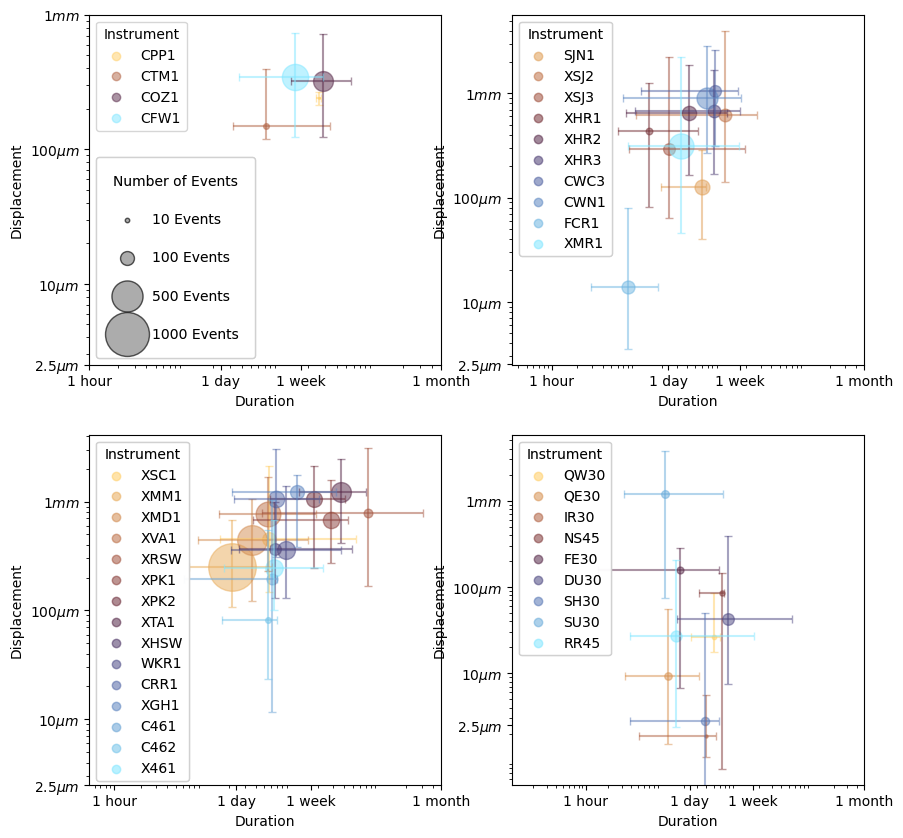

In [139]:
plt.figure(figsize=(10,10))
axa = plt.subplot(2,2,1)
scatter_points(HAY,df_all,axa,cmap)
axb = plt.subplot(2,2,2)
scatter_points(HOL,df_all,axb,cmap)
axc = plt.subplot(2,2,3)
scatter_points(PARK,df_all,axc,cmap)
axd = plt.subplot(2,2,4)
scatter_points(SOCAL,df_all,axd,cmap)
plt.show()

/Users/dagi9522/miniconda3/envs/creepmeters/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/dagi9522/miniconda3/envs/creepmeters/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_57804/3662570462.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=network)


no events


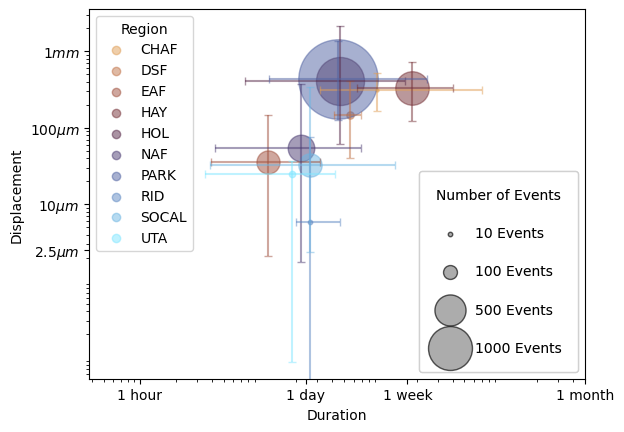

In [140]:
plt.figure()
axa = plt.subplot(1,1,1)
scatter_points_all(creepmeters,df_all,axa,cmap)
plt.show()

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_57804/1564382901.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv)
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_57804/1564382901.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv)


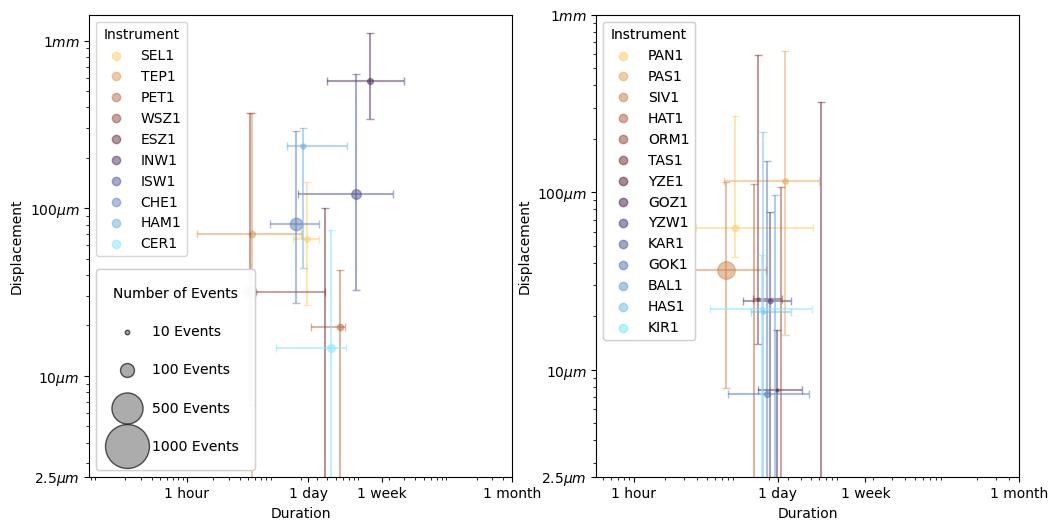

In [76]:
plt.figure(figsize=(12,6))
axa = plt.subplot(1,2,1)
scatter_points(NAF,df_all,axa,cmap)
axb = plt.subplot(1,2,2)
scatter_points(EAF,df_all,axb,cmap)
plt.show()

In [77]:
def utm_from_lon(lon):
    """
    utm_from_lon - UTM zone for a longitude

    Not right for some polar regions (Norway, Svalbard, Antartica)

    :param float lon: longitude
    :return: UTM zone number
    :rtype: int
    """
    return floor( ( lon + 180 ) / 6) + 1

def scale_bar(ax, proj, length, location=(0.2, 0.05), linewidth=3,
              units='km', m_per_unit=1000):
    """

    http://stackoverflow.com/a/35705477/1072212
    ax is the axes to draw the scalebar on.
    proj is the projection the axes are in
    location is center of the scalebar in axis coordinates ie. 0.5 is the middle of the plot
    length is the length of the scalebar in km.
    linewidth is the thickness of the scalebar.
    units is the name of the unit
    m_per_unit is the number of meters in a unit
    """
    # find lat/lon center to find best UTM zone
    x0, x1, y0, y1 = ax.get_extent(proj.as_geodetic())
    # Projection in metres
    utm = ccrs.UTM(utm_from_lon((x0+x1)/2))
    # Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(utm)
    # Turn the specified scalebar location into coordinates in metres
    sbcx, sbcy = x0 + (x1 - x0) * location[0], y0 + (y1 - y0) * location[1]
    # Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbcx - length * m_per_unit/2, sbcx + length * m_per_unit/2]
    # buffer for scalebar
    buffer = [pe.withStroke(linewidth=5, foreground="w")]
    # Plot the scalebar with buffer
    ax.plot(bar_xs, [sbcy, sbcy], transform=utm, color='k',
        linewidth=linewidth, path_effects=buffer)
    # buffer for text
    buffer = [pe.withStroke(linewidth=3, foreground="w")]
    # Plot the scalebar label
    t0 = ax.text(sbcx, sbcy, str(length) + ' ' + units, transform=utm,
        horizontalalignment='center', verticalalignment='bottom',
        path_effects=buffer, zorder=2)
    left = x0+(x1-x0)*0.05
    # Plot the N arrow
    t1 = ax.text(left, sbcy, u'\u25B2\nN', transform=utm,
        horizontalalignment='center', verticalalignment='bottom',
        path_effects=buffer, zorder=2)
    # Plot the scalebar without buffer, in case covered by text buffer
    ax.plot(bar_xs, [sbcy, sbcy], transform=utm, color='k',
        linewidth=linewidth, zorder=3)


def cm_plotter(ax,creepmeters_list,gdf,extent,color,shift,scale,show_labels=True):
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    # Add Fault geometries
    ax.add_geometries(gdf.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
    # Add gridlines with specific label font sizes
    gl = ax.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

    if show_labels:
        gl.xlabel_style = {'size': 20}
        gl.ylabel_style = {'size': 20}

        # Get the rounded extent values for longitude (x) and latitude (y)
        lon_min, lon_max = np.round(extent[0], 1), np.round(extent[1], 1)
        lat_min, lat_max = np.round(extent[2], 1), np.round(extent[3], 1)

        # Determine a reasonable interval for longitude (x-axis)
        lon_range = abs(lon_max - lon_min)
        if lon_range < 0.5:
            lon_step = 0.1
        elif lon_range <= 1:
            lon_step = 0.2
        elif lon_range <=2:
            lon_step = 0.5
        else:
            lon_step = 1.0

        # Determine a reasonable interval for latitude (y-axis)
        lat_range = abs(lat_max - lat_min)
        if lat_range < 0.5:
            lat_step = 0.1
        elif lat_range <= 1:
            lat_step = 0.2
        elif lat_range <=2:
            lat_step = 0.5
        else:
            lat_step = 1.0

        # Apply MultipleLocator to both axes
        gl.xlocator = mticker.MultipleLocator(lon_step)
        gl.ylocator = mticker.MultipleLocator(lat_step)

    else:
        gl.xlabels_top = False
        gl.xlabels_bottom = False
        gl.ylabels_left = False
        gl.ylabels_right = False

    # Add annotation with an arrow and transform
    for i in range(len(creepmeters_list)):
        abbrv = creepmeters_list['Creepmeter_abbrv'].iloc[i]
        lat = creepmeters_list['Latitude'].iloc[i]
        long = creepmeters_list['Longitude'].iloc[i]
        face_color = rgb2hex(color[i])
        # Default xytext offset
        if shift == 'horizontal':
            # Adjust xytext for specific creepmeter abbreviations
            if abbrv in ['XRSW', 'XTA1','XHSW', 'C461','CWN1','CRR1','XMM1','XSJ3','XHR2','QE30','NS45','DU30','RA','GS']:
                xytext_lon = long - 0.1  # Subtract 0.1 for these specific abbreviations
            else:
                xytext_lon = long + 0.1
            if abbrv in ['CPP1','CWC3','CWN1','XSJ2']:
                xytext_lat = lat-0.01
            elif abbrv in ['X461','XPK2']:
                xytext_lat = lat-0.02
            elif abbrv in ['XRSW']:
                xytext_lat = lat+0.01

            else:
                xytext_lat = lat
        if shift == 'vertical':
            if abbrv in ['QE30','NS45','DU30']:
                xytext_lon = long 
                xytext_lat = lat + 0.2
            else:
                xytext_lon = long 
                xytext_lat = lat - 0.2
        
        
        
        ax.annotate(
            creepmeters_list['Creepmeter_abbrv'].iloc[i], 
            xy=(creepmeters_list['Longitude'].iloc[i], creepmeters_list['Latitude'].iloc[i]),
            xytext=(xytext_lon, xytext_lat), 
            arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=3),
            bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
            fontsize=14, ha='center', va='center',
            transform=ccrs.PlateCarree()  # Make sure coordinates are correct
        )
        # Scatter points for creepmeters
        ax.scatter(
            creepmeters_list['Longitude'].iloc[i], 
            creepmeters_list['Latitude'].iloc[i], 
            color=face_color, 
            edgecolor='black', 
            s=100, 
            zorder=100, 
            transform=ccrs.Geodetic()
        )
        scale_bar(ax, ccrs.PlateCarree(), scale)
    return





def ymd_to_ydec(ST):
    y = int(ST.strftime("%Y"))
    dt_starter = dt.datetime(y,1,1,0,0,0)
    diff = (ST.replace(tzinfo=None)-dt_starter)/dt.timedelta(days=1)
    isleapyear = calendar.isleap(y)
    if isleapyear == True:
        diff_dec = diff/366
    else:
        diff_dec = diff/365
    date_dec = y+diff_dec
    return date_dec


    

In [78]:
def mapsubplot(axis,extent,cmap,instrument_dataframe,faults,scale,shift):
    colours  = cmap(np.linspace(0, 1, len(instrument_dataframe)))
    # Initialize OpenStreetMap tiles
    osm = img_tiles.OSM()
    # Add OpenStreetMap tiles to the plot
    axis.add_image(osm, 10)  # Zoom level of 8  
    # Add natural earth features for oceans and lakes
    ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                            edgecolor='face', facecolor='lightblue')
    lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                            edgecolor='face', facecolor='lightblue')
    # Add the land with pale sage green color
    pale_sage_green = '#D0E8D0'  # Very pale sage green color
    land = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face', facecolor=pale_sage_green)

    # Add the features to the map
    axis.add_feature(ocean, zorder=0)  # Add oceans first
    axis.add_feature(lakes, zorder=1)  # Add lakes
    axis.add_feature(land, zorder=0)   # Add land with pale sage green

    # Add coastlines and other features if desired
    axis.coastlines(resolution='50m')
    cm_plotter(axis,instrument_dataframe,faults,extent,colours,shift,scale)
    return

In [79]:
import warnings

# Suppress specific warning
warnings.filterwarnings("ignore", message="Approximating coordinate system")

hollister_extent = [-121.75,-121.0,36.5,37.0]
hayward_extent = [-122.4,-121.8,37.5,38]
parkfield_extent = [-120.75,-120.1,35.65,36.1]
salton_sea_extent = [-116.25,-115.25,32.5,34]
RID_extent = [-118,-117, 35.2,35.8]




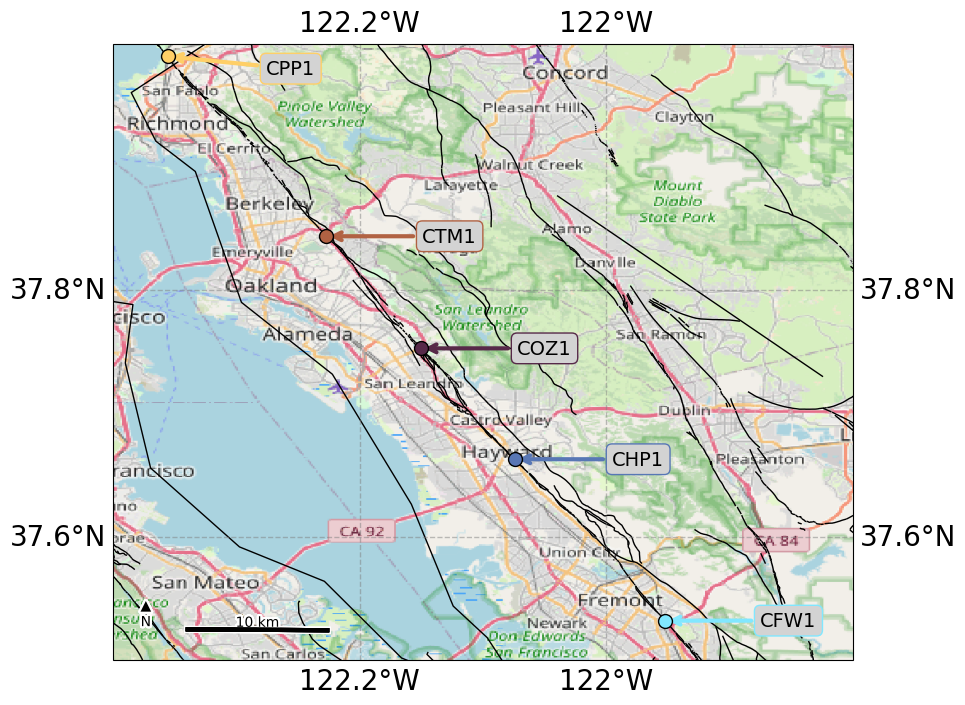

In [80]:
fig = plt.figure(figsize=(20,8))
axa = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
mapsubplot(axa,hayward_extent,cmap,HAY,gdf_Cali,10,'horizontal')
plt.show()

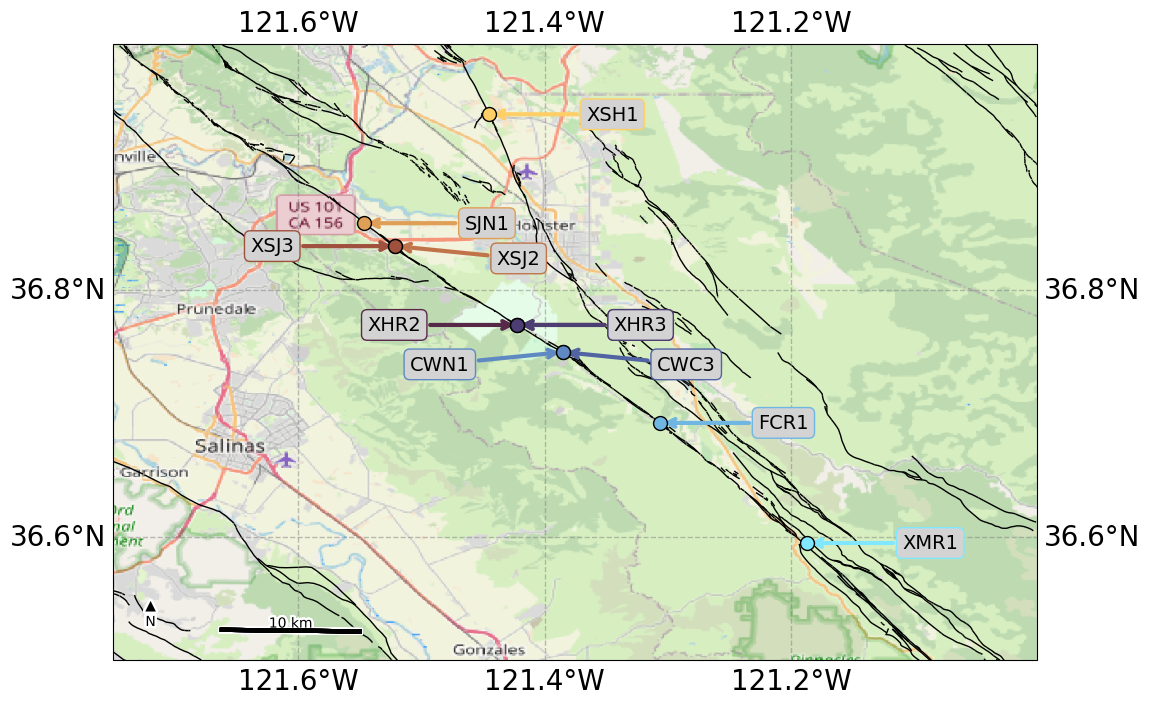

In [81]:
fig = plt.figure(figsize=(20,8))
axb = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
mapsubplot(axb,hollister_extent,cmap,HOL,gdf_Cali,10,'horizontal')
plt.show()



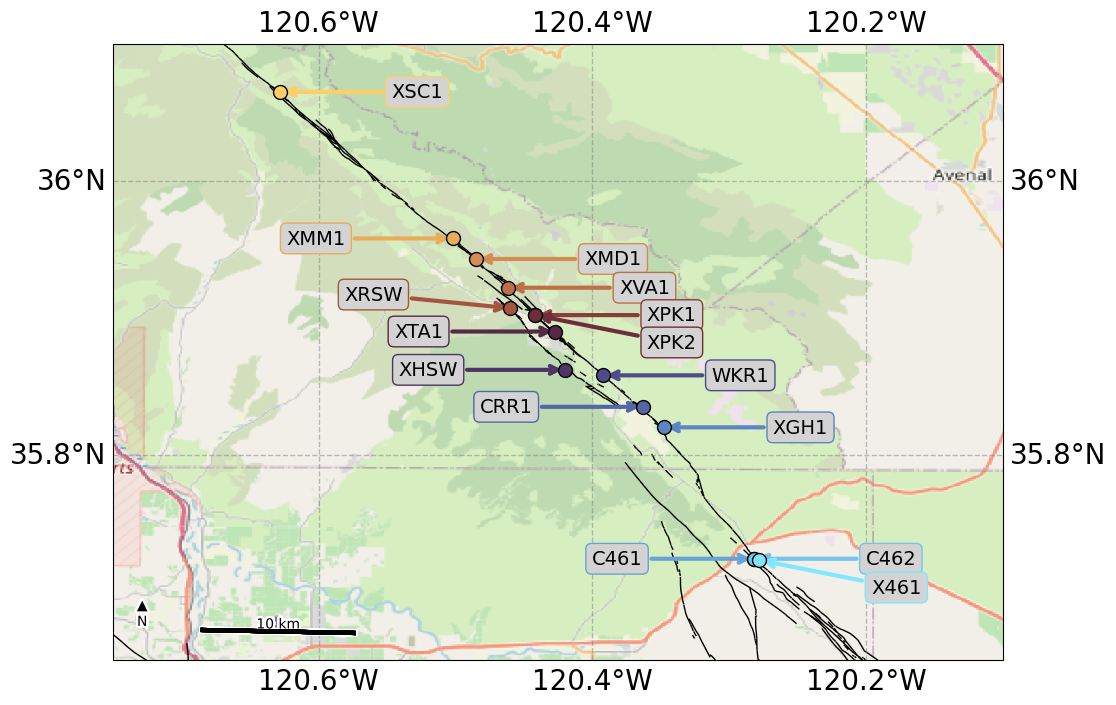

In [82]:
fig = plt.figure(figsize=(20,8))
axc = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
mapsubplot(axc,parkfield_extent,cmap,PARK,gdf_Cali,10,'horizontal')
plt.show()


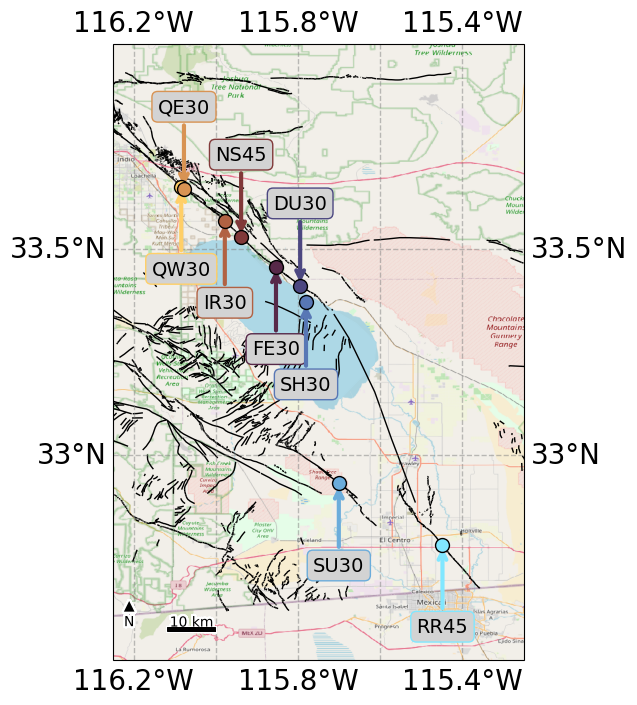

In [83]:
fig = plt.figure(figsize=(20,8))
axd = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
mapsubplot(axd,salton_sea_extent,cmap,SOCAL,gdf_Cali,10,'vertical')
plt.show()

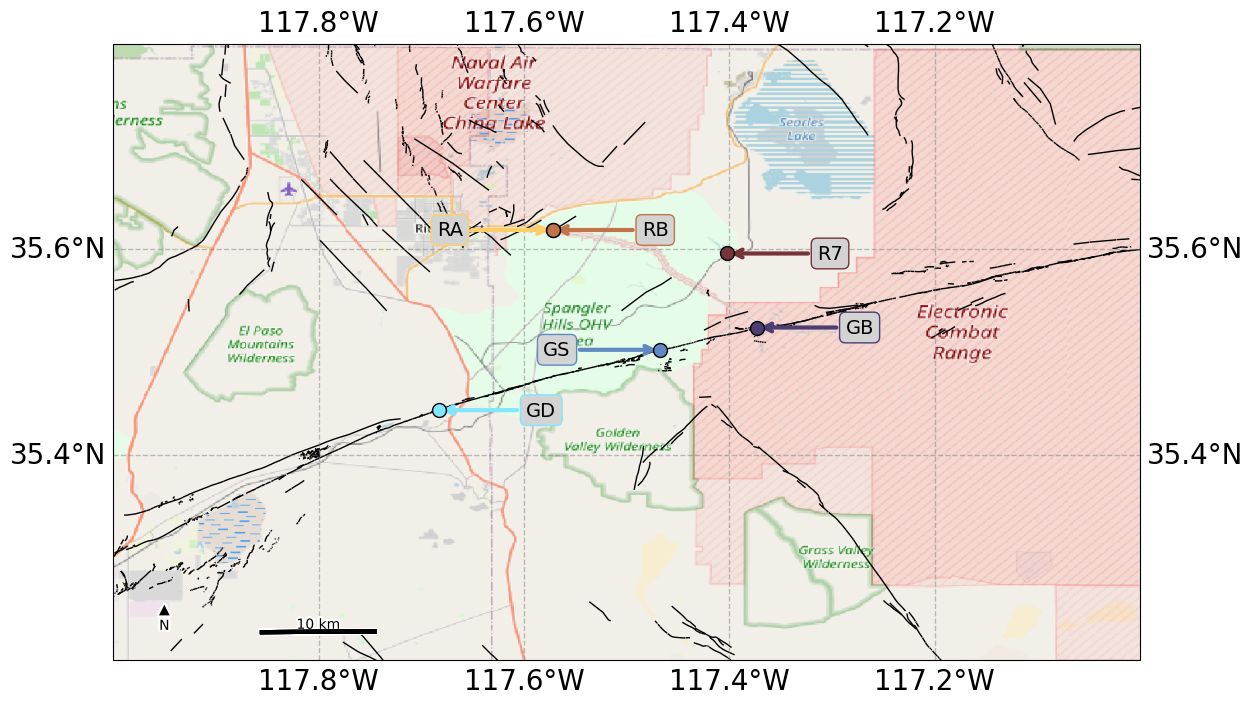

In [84]:
fig = plt.figure(figsize=(20,8))
axe = plt.subplot(1,1,1,projection=ccrs.PlateCarree())
mapsubplot(axe,RID_extent,cmap,RID,gdf_Cali,10,'horizontal')
plt.show()

In [85]:
def NAF_map(axa,NAF_extent,gdf_Asia,NAF,cmap,show_labels=True):
    osm = img_tiles.OSM()
    axa.add_image(osm, 8)  # Zoom level of 8 
    ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                            edgecolor='face', facecolor='lightblue')
    lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                            edgecolor='face', facecolor='lightblue')
    # Add the land with pale sage green color
    pale_sage_green = '#D0E8D0'  # Very pale sage green color
    land = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face', facecolor=pale_sage_green)

    # Add the features to the map
    axa.add_feature(ocean, zorder=0)  # Add oceans first
    axa.add_feature(lakes, zorder=1)  # Add lakes
    axa.add_feature(land, zorder=0)   # Add land with pale sage green

    # Add coastlines and other features if desired
    axa.coastlines(resolution='50m')
    axa.set_extent(NAF_extent, crs=ccrs.PlateCarree())
    axa.add_geometries(gdf_Asia.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
    gl = axa.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

    if show_labels:
        gl.xlabel_style = {'size': 20}
        gl.ylabel_style = {'size': 20}

        # Get the rounded extent values for longitude (x) and latitude (y)
        lon_min, lon_max = np.round(NAF_extent[0], 1), np.round(NAF_extent[1], 1)
        lat_min, lat_max = np.round(NAF_extent[2], 1), np.round(NAF_extent[3], 1)

        # Determine a reasonable interval for longitude (x-axis)
        lon_range = abs(lon_max - lon_min)
        if lon_range <= 0.5:
            lon_step = 0.1
        elif lon_range <= 1:
            lon_step = 0.2
        elif lon_range <=2:
            lon_step = 0.5
        else:
            lon_step = 1.0

        # Determine a reasonable interval for latitude (y-axis)
        lat_range = abs(lat_max - lat_min)
        if lat_range <= 0.5:
            lat_step = 0.1
        elif lat_range <= 1:
            lat_step = 0.2
        elif lat_range <=2:
            lat_step = 0.5
        else:
            lat_step = 1.0

        # Apply MultipleLocator to both axes
        gl.xlocator = mticker.MultipleLocator(lon_step)
        gl.ylocator = mticker.MultipleLocator(lat_step)

    else:
        gl.xlabels_top = False
        gl.xlabels_bottom = False
        gl.ylabels_left = False
        gl.ylabels_right = False

    
    shift='vertical'
    colours  = cmap(np.linspace(0, 1, len(NAF)))

    for i in range(len(NAF)):
        face_color = rgb2hex(colours[i])
        # Default xytext offset
        if shift == 'vertical':
            xytext_lon = NAF['Longitude'].iloc[i] 
            xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['TEP1']:
                xytext_lon = NAF['Longitude'].iloc[i]
                xytext_lat = NAF['Latitude'].iloc[i]-0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['CER1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.15
                xytext_lat = NAF['Latitude'].iloc[i]
            if NAF['Creepmeter_abbrv'].iloc[i] in ['HAM1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.3
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['CHE1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.15
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['PET1']:
                xytext_lon = NAF['Longitude'].iloc[i]-0.3
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['WSZ1']:
                xytext_lon = NAF['Longitude'].iloc[i]-0.1
                xytext_lat = NAF['Latitude'].iloc[i]-0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['ISW1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.1
                xytext_lat = NAF['Latitude'].iloc[i]-0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['ESZ1']:
                xytext_lon = NAF['Longitude'].iloc[i]-0.15
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['INW1']:
                xytext_lon = NAF['Longitude'].iloc[i]
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            
        
        axa.annotate(
            NAF['Creepmeter_abbrv'].iloc[i], 
            xy=(NAF['Longitude'].iloc[i], NAF['Latitude'].iloc[i]),
            xytext=(xytext_lon, xytext_lat), 
            arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=3),
            bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
            fontsize=14, ha='center', va='center',
            transform=ccrs.PlateCarree()  # Make sure coordinates are correct
        )
        # Scatter points for creepmeters
        axa.scatter(
            NAF['Longitude'].iloc[i], 
            NAF['Latitude'].iloc[i], 
            color=face_color, 
            edgecolor='black', 
            s=100, 
            zorder=100, 
            transform=ccrs.Geodetic()
        )
    scale_bar(axa, ccrs.PlateCarree(), 10)
    return

In [86]:
def EAF_map(axa,EAF_extent,gdf_Asia,EAF,cmap,show_labels=True):
    # Initialize OpenStreetMap tiles
    osm = img_tiles.OSM()

    # Add OpenStreetMap tiles to the plot
    axa.add_image(osm, 10)  # Zoom level of 8 

    osm = img_tiles.OSM()
    axa.add_image(osm, 8)  # Zoom level of 8 
    ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                            edgecolor='face', facecolor='lightblue')
    lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                            edgecolor='face', facecolor='lightblue')
    # Add the land with pale sage green color
    pale_sage_green = '#D0E8D0'  # Very pale sage green color
    land = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face', facecolor=pale_sage_green)

    # Add the features to the map
    axa.add_feature(ocean, zorder=0)  # Add oceans first
    axa.add_feature(lakes, zorder=1)  # Add lakes
    axa.add_feature(land, zorder=0)   # Add land with pale sage green

    # Add coastlines and other features if desired
    axa.coastlines(resolution='50m')

    axa.set_extent(EAF_extent, crs=ccrs.PlateCarree())
    axa.add_geometries(gdf_Asia.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
    gl = axa.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

    if show_labels:
        gl.xlabel_style = {'size': 20}
        gl.ylabel_style = {'size': 20}

        # Get the rounded extent values for longitude (x) and latitude (y)
        lon_min, lon_max = np.round(EAF_extent[0], 1), np.round(EAF_extent[1], 1)
        lat_min, lat_max = np.round(EAF_extent[2], 1), np.round(EAF_extent[3], 1)

        # Determine a reasonable interval for longitude (x-axis)
        lon_range = abs(lon_max - lon_min)
        if lon_range <= 0.5:
            lon_step = 0.1
        elif lon_range <= 1:
            lon_step = 0.2
        elif lon_range <=2:
            lon_step = 0.5
        else:
            lon_step = 1.0

        # Determine a reasonable interval for latitude (y-axis)
        lat_range = abs(lat_max - lat_min)
        if lat_range <= 0.5:
            lat_step = 0.1
        elif lat_range <= 1:
            lat_step = 0.2
        elif lat_range <=2:
            lat_step = 0.5
        else:
            lat_step = 1.0

        # Apply MultipleLocator to both axes
        gl.xlocator = mticker.MultipleLocator(lon_step)
        gl.ylocator = mticker.MultipleLocator(lat_step)

    else:
        gl.xlabels_top = False
        gl.xlabels_bottom = False
        gl.ylabels_left = False
        gl.ylabels_right = False


    shift='vertical'
    colours  = cmap(np.linspace(0, 1, len(EAF)))


    for i in range(len(EAF)):
        face_color = rgb2hex(colours[i])
        # Default xytext offset
        if shift == 'horizontal':
            # Adjust xytext for specific creepmeter abbreviations
            if EAF['Creepmeter_abbrv'].iloc[i] in ['XRSW', 'XTA1','XHSW', 'C461','CWN1/CWC3','CRR1','XMM1','QW30','SC30/72/TE']:
                xytext_lon = EAF['Longitude'].iloc[i] - 0.1  # Subtract 0.1 for these specific abbreviations
            else:
                xytext_lon = EAF['Longitude'].iloc[i] + 0.1
            xytext_lat = EAF['Latitude'].iloc[i]
        if shift == 'vertical':
            xytext_lon = EAF['Longitude'].iloc[i] 
            xytext_lat = EAF['Latitude'].iloc[i] + 0.2
            if EAF['Creepmeter_abbrv'].iloc[i] in ['TAS1']:
                xytext_lon = EAF['Longitude'].iloc[i]+0.3
                xytext_lat = EAF['Latitude'].iloc[i]
            if EAF['Creepmeter_abbrv'].iloc[i] in ['YZW1','BAL1']:
                xytext_lon = EAF['Longitude'].iloc[i]
                xytext_lat = EAF['Latitude'].iloc[i]-0.3
            if EAF['Creepmeter_abbrv'].iloc[i] in ['YZE1']:
                xytext_lon = EAF['Longitude'].iloc[i]+0.2
                xytext_lat = EAF['Latitude'].iloc[i]-0.2
        
        
        axa.annotate(
            EAF['Creepmeter_abbrv'].iloc[i], 
            xy=(EAF['Longitude'].iloc[i], EAF['Latitude'].iloc[i]),
            xytext=(xytext_lon, xytext_lat), 
            arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=3),
            bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
            fontsize=14, ha='center', va='center',
            transform=ccrs.PlateCarree()  # Make sure coordinates are correct
        )
        # Scatter points for creepmeters
        axa.scatter(
            EAF['Longitude'].iloc[i], 
            EAF['Latitude'].iloc[i], 
            color=face_color, 
            edgecolor='black', 
            s=100, 
            zorder=100, 
            transform=ccrs.Geodetic()
        )
    scale_bar(axa, ccrs.PlateCarree(), 10)
    return

In [87]:
def NAF_map_Zoom(axa,NAF_extent,gdf_Asia,NAF,cmap,show_labels=True):
    osm = img_tiles.OSM()
    axa.add_image(osm, 8)  # Zoom level of 8 
    ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                            edgecolor='face', facecolor='lightblue')
    lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                            edgecolor='face', facecolor='lightblue')
    # Add the land with pale sage green color
    pale_sage_green = '#D0E8D0'  # Very pale sage green color
    land = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face', facecolor=pale_sage_green)

    # Add the features to the map
    axa.add_feature(ocean, zorder=0)  # Add oceans first
    axa.add_feature(lakes, zorder=1)  # Add lakes
    axa.add_feature(land, zorder=0)   # Add land with pale sage green

    # Add coastlines and other features if desired
    axa.coastlines(resolution='50m')
    axa.set_extent(NAF_extent, crs=ccrs.PlateCarree())
    axa.add_geometries(gdf_Asia.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
    gl = axa.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

    if show_labels:
        gl.xlabel_style = {'size': 20}
        gl.ylabel_style = {'size': 20}

        # Get the rounded extent values for longitude (x) and latitude (y)
        lon_min, lon_max = np.round(NAF_extent[0], 1), np.round(NAF_extent[1], 1)
        lat_min, lat_max = np.round(NAF_extent[2], 1), np.round(NAF_extent[3], 1)

        # Determine a reasonable interval for longitude (x-axis)
        lon_range = abs(lon_max - lon_min)
        if lon_range <= 0.5:
            lon_step = 0.1
        elif lon_range <= 1:
            lon_step = 0.2
        elif lon_range <=2:
            lon_step = 0.5
        else:
            lon_step = 1.0

        # Determine a reasonable interval for latitude (y-axis)
        lat_range = abs(lat_max - lat_min)
        if lat_range <= 0.5:
            lat_step = 0.1
        elif lat_range <= 1:
            lat_step = 0.2
        elif lat_range <=2:
            lat_step = 0.5
        else:
            lat_step = 1.0

        # Apply MultipleLocator to both axes
        gl.xlocator = mticker.MultipleLocator(lon_step)
        gl.ylocator = mticker.MultipleLocator(lat_step)

    else:
        gl.xlabels_top = False
        gl.xlabels_bottom = False
        gl.ylabels_left = False
        gl.ylabels_right = False

    
    shift='vertical'
    colours  = cmap(np.linspace(0, 1, len(NAF)+2))

    for i in range(len(NAF)):
        face_color = rgb2hex(colours[i+2])
        # Default xytext offset
        if shift == 'vertical':
            xytext_lon = NAF['Longitude'].iloc[i] 
            xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['TEP1']:
                xytext_lon = NAF['Longitude'].iloc[i]
                xytext_lat = NAF['Latitude'].iloc[i]-0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['CER1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.15
                xytext_lat = NAF['Latitude'].iloc[i]
            if NAF['Creepmeter_abbrv'].iloc[i] in ['HAM1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.3
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['CHE1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.15
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['PET1']:
                xytext_lon = NAF['Longitude'].iloc[i]-0.3
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['WSZ1']:
                xytext_lon = NAF['Longitude'].iloc[i]-0.1
                xytext_lat = NAF['Latitude'].iloc[i]-0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['ISW1']:
                xytext_lon = NAF['Longitude'].iloc[i]+0.1
                xytext_lat = NAF['Latitude'].iloc[i]-0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['ESZ1']:
                xytext_lon = NAF['Longitude'].iloc[i]-0.15
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            if NAF['Creepmeter_abbrv'].iloc[i] in ['INW1']:
                xytext_lon = NAF['Longitude'].iloc[i]
                xytext_lat = NAF['Latitude'].iloc[i]+0.1
            
        
        axa.annotate(
            NAF['Creepmeter_abbrv'].iloc[i], 
            xy=(NAF['Longitude'].iloc[i], NAF['Latitude'].iloc[i]),
            xytext=(xytext_lon, xytext_lat), 
            arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=3),
            bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
            fontsize=14, ha='center', va='center',
            transform=ccrs.PlateCarree()  # Make sure coordinates are correct
        )
        # Scatter points for creepmeters
        axa.scatter(
            NAF['Longitude'].iloc[i], 
            NAF['Latitude'].iloc[i], 
            color=face_color, 
            edgecolor='black', 
            s=100, 
            zorder=100, 
            transform=ccrs.Geodetic()
        )
    scale_bar(axa, ccrs.PlateCarree(), 10)
    return

In [88]:
pakistan_extent = [61, 78, 23, 38]
EAF_extent = [36.0, 40.25, 36.0, 39]
NAF_extent = [29.5,33.1,40.4,41.1]
UTA_extent = [-114.2,-108.5, 36.8,42.2]
turkey_extent = [26.0, 45.0, 36.0, 42.0]
NAF_zoom_extent = [31.9,33.1,40.5,41.1]

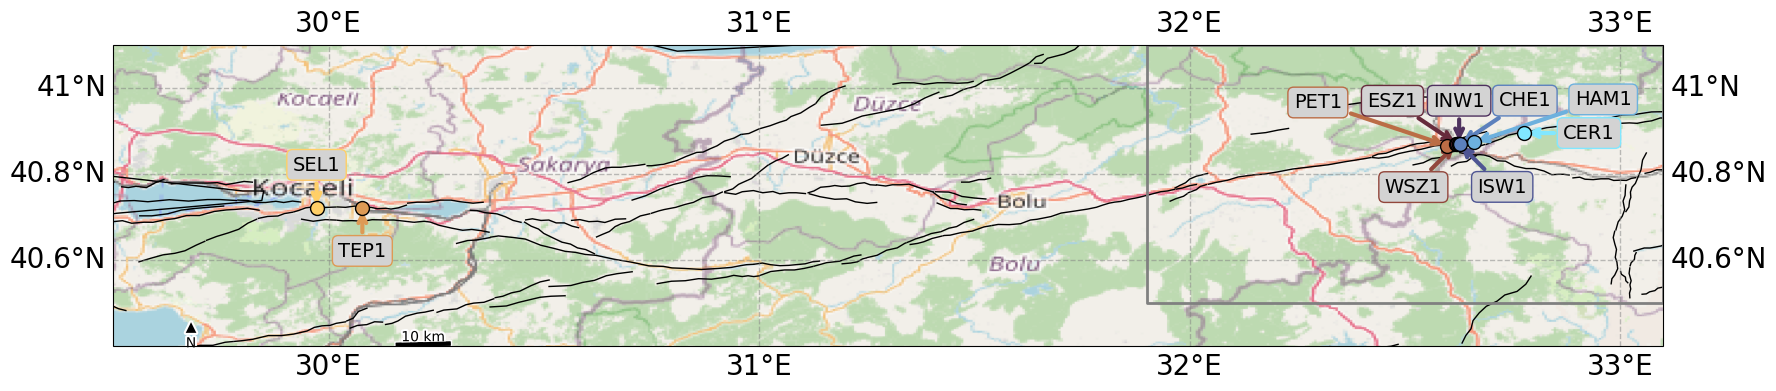

In [89]:
plt.figure(figsize=(20,8))
axa = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
NAF_map(axa,NAF_extent,gdf_Asia,NAF,cmap)
bbox = box(NAF_zoom_extent[0], NAF_zoom_extent[2], NAF_zoom_extent[1], NAF_zoom_extent[3])
axa.add_geometries([bbox], ccrs.PlateCarree(), edgecolor='grey', facecolor='none', linestyle='-', linewidth=2)
axa.plot()
plt.show()

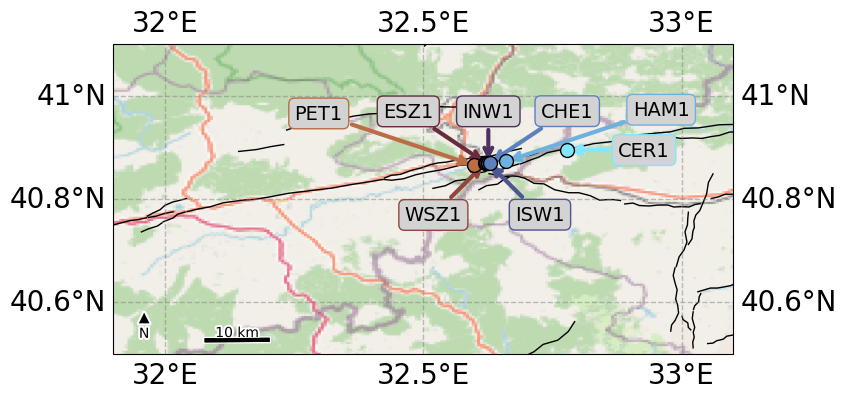

In [90]:

NAF_ZOOM = NAF.copy(deep=True)
NAF_ZOOM.drop(NAF_ZOOM[NAF_ZOOM['Creepmeter_abbrv']=='SEL1'].index,inplace=True)
NAF_ZOOM.drop(NAF_ZOOM[NAF_ZOOM['Creepmeter_abbrv']=='TEP1'].index,inplace=True)
NAF_ZOOM.reset_index(inplace=True,drop=True)
plt.figure(figsize=(8,8))
axa = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
NAF_map_Zoom(axa,NAF_zoom_extent,gdf_Asia,NAF_ZOOM,cmap)
axa.plot()
plt.show()

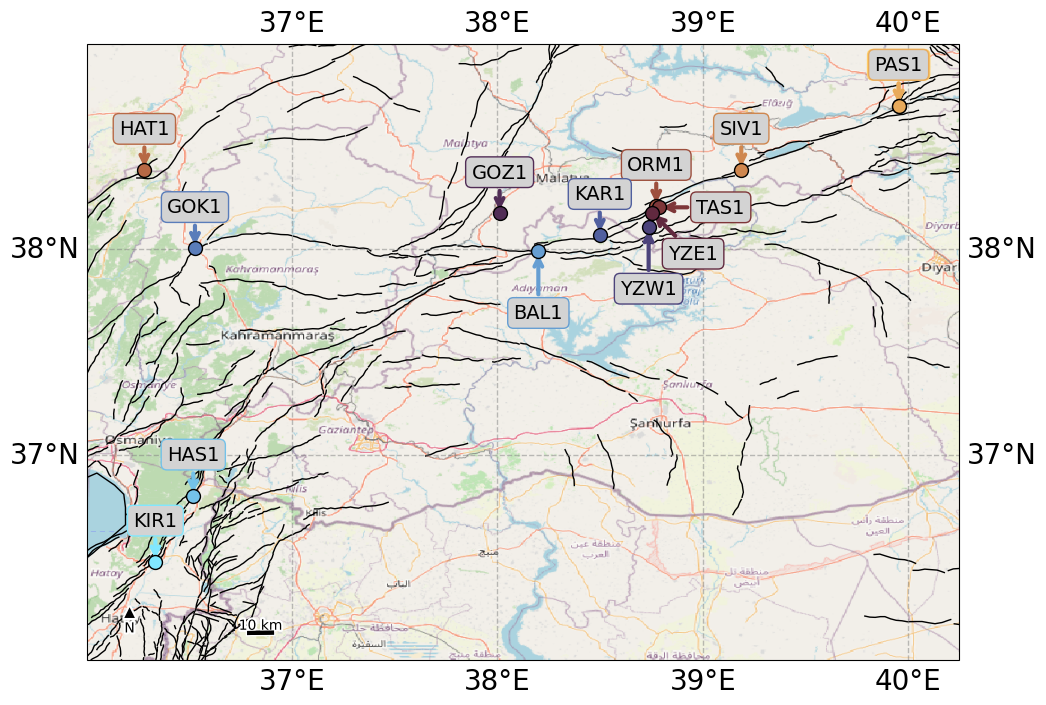

In [91]:
plt.figure(figsize=(20,8))
axa = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
EAF_map(axa,EAF_extent,gdf_Asia,EAF,cmap)
plt.show()




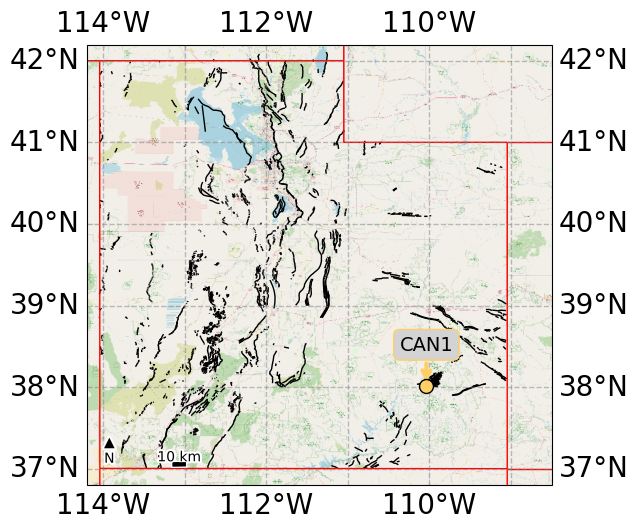

In [105]:
fig = plt.figure(figsize=(6, 6))

axa= plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Initialize OpenStreetMap tiles
osm = img_tiles.OSM()

# Add OpenStreetMap tiles to the plot
axa.add_image(osm, 10)  # Zoom level of 8 
axa.set_extent(UTA_extent, crs=ccrs.PlateCarree())
axa.add_geometries(gdf_Utah.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
show_labels=True
gl = axa.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

if show_labels:
    gl.xlabel_style = {'size': 20}
    gl.ylabel_style = {'size': 20}

    # Get the rounded extent values for longitude (x) and latitude (y)
    lon_min, lon_max = np.round(EAF_extent[0], 1), np.round(EAF_extent[1], 1)
    lat_min, lat_max = np.round(EAF_extent[2], 1), np.round(EAF_extent[3], 1)

    # Determine a reasonable interval for longitude (x-axis)
    lon_range = abs(lon_max - lon_min)
    if lon_range <= 0.5:
        lon_step = 0.1
    elif lon_range <= 1:
        lon_step = 0.2
    elif lon_range <=2:
        lon_step = 0.5
    else:
        lon_step = 1.0

    # Determine a reasonable interval for latitude (y-axis)
    lat_range = abs(lat_max - lat_min)
    if lat_range <= 0.5:
        lat_step = 0.1
    elif lat_range <= 1:
        lat_step = 0.2
    elif lat_range <=2:
        lat_step = 0.5
    else:
        lat_step = 1.0

    # Apply MultipleLocator to both axes
    gl.xlocator = mticker.MultipleLocator(lon_step)
    gl.ylocator = mticker.MultipleLocator(lat_step)

else:
    gl.xlabels_top = False
    gl.xlabels_bottom = False
    gl.ylabels_left = False
    gl.ylabels_right = False
shift='vertical'

# Add state boundaries
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

axa.add_feature(states_provinces, edgecolor='red',linewidth=1)
colours  = cmap(np.linspace(0, 1, 3))
for i in range(len(UTA)):
    
    face_color = rgb2hex(colours[0])
    # Default xytext offset
    if shift == 'horizontal':
        # Adjust xytext for specific creepmeter abbreviations
        xytext_lon = UTA['Longitude'].iloc[i] + 0.2
        xytext_lat = UTA['Latitude'].iloc[i]
    if shift == 'vertical':
        xytext_lon = UTA['Longitude'].iloc[i] 
        xytext_lat = UTA['Latitude'].iloc[i]+0.5
        if RID['Creepmeter_abbrv'].iloc[i] in ['WSZ1']:
            xytext_lon = UTA['Longitude'].iloc[i]
            xytext_lat = UTA['Latitude'].iloc[i]-0.05
        
        
    
    axa.annotate(
        UTA['Creepmeter_abbrv'].iloc[i], 
        xy=(UTA['Longitude'].iloc[i], UTA['Latitude'].iloc[i]),
        xytext=(xytext_lon, xytext_lat), 
        arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=3),
        bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
        fontsize=14, ha='center', va='center',
        transform=ccrs.PlateCarree()  # Make sure coordinates are correct
    )
    # Scatter points for creepmeters
    axa.scatter(
        UTA['Longitude'].iloc[i], 
        UTA['Latitude'].iloc[i], 
        color=face_color, 
        edgecolor='black', 
        s=100, 
        zorder=100, 
        transform=ccrs.Geodetic()
    )
scale_bar(axa, ccrs.PlateCarree(), 10)
#plt.savefig('Utah_map.pdf')
plt.show()

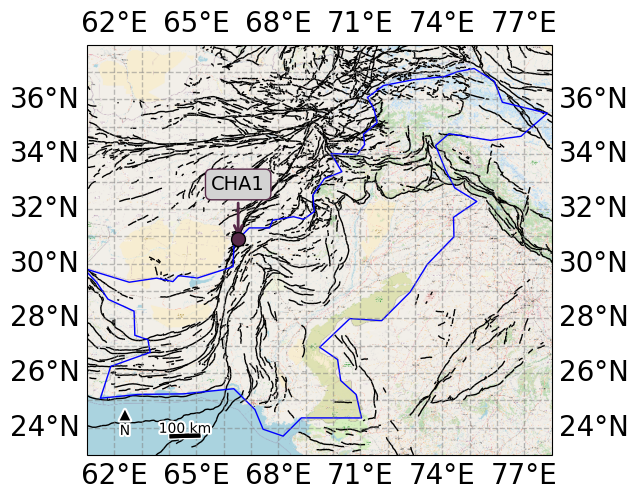

In [103]:
fig = plt.figure(figsize=(6, 6))

axa= plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Initialize OpenStreetMap tiles
osm = img_tiles.OSM()

# Add OpenStreetMap tiles to the plot
axa.add_image(osm, 8)  # Zoom level of 8 
axa.set_extent(pakistan_extent, crs=ccrs.PlateCarree())
axa.add_geometries(gdf_Asia.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
shapefile_countries = natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
for country in Reader(shapefile_countries).records():
    country_name = country.attributes['NAME']
    if country_name == 'Pakistan':
        axa.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='blue', facecolor='none', linewidth=1)



show_labels=True
gl = axa.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

if show_labels:
    gl.xlabel_style = {'size': 20}
    gl.ylabel_style = {'size': 20}

    # Get the rounded extent values for longitude (x) and latitude (y)
    lon_min, lon_max = np.round(EAF_extent[0], 1), np.round(EAF_extent[1], 1)
    lat_min, lat_max = np.round(EAF_extent[2], 1), np.round(EAF_extent[3], 1)

    # Determine a reasonable interval for longitude (x-axis)
    lon_range = abs(lon_max - lon_min)
    if lon_range <= 0.5:
        lon_step = 0.1
    elif lon_range <= 1:
        lon_step = 0.2
    elif lon_range <=2:
        lon_step = 0.5
    else:
        lon_step = 1.0

    # Determine a reasonable interval for latitude (y-axis)
    lat_range = abs(lat_max - lat_min)
    if lat_range <= 0.5:
        lat_step = 0.1
    elif lat_range <= 1:
        lat_step = 0.2
    elif lat_range <=2:
        lat_step = 0.5
    else:
        lat_step = 1.0

    # Apply MultipleLocator to both axes
    gl.xlocator = mticker.MultipleLocator(lon_step)
    gl.ylocator = mticker.MultipleLocator(lat_step)

else:
    gl.xlabels_top = False
    gl.xlabels_bottom = False
    gl.ylabels_left = False
    gl.ylabels_right = False
shift='vertical'

for i in range(len(CHAF)):
    face_color = rgb2hex(colours[1])
    # Default xytext offset
    if shift == 'horizontal':
        # Adjust xytext for specific creepmeter abbreviations
        xytext_lon = CHAF['Longitude'].iloc[i] + 0.5
        xytext_lat = CHAF['Latitude'].iloc[i]
    if shift == 'vertical':
        xytext_lon = CHAF['Longitude'].iloc[i] 
        xytext_lat = CHAF['Latitude'].iloc[i]+2
        if RID['Creepmeter_abbrv'].iloc[i] in ['WSZ1']:
            xytext_lon = CHAF['Longitude'].iloc[i]
            xytext_lat = CHAF['Latitude'].iloc[i]-0.05
        
        
    
    axa.annotate(
        CHAF['Creepmeter_abbrv'].iloc[i], 
        xy=(CHAF['Longitude'].iloc[i], CHAF['Latitude'].iloc[i]),
        xytext=(xytext_lon, xytext_lat), 
        arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=2),
        bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
        fontsize=14, ha='center', va='center',
        transform=ccrs.PlateCarree()  # Make sure coordinates are correct
    )
    # Scatter points for creepmeters
    axa.scatter(
        CHAF['Longitude'].iloc[i], 
        CHAF['Latitude'].iloc[i], 
        color=face_color, 
        edgecolor='black', 
        s=100, 
        zorder=100, 
        transform=ccrs.Geodetic()
    )
scale_bar(axa, ccrs.PlateCarree(), 100)
#plt.savefig('Pakistan_map.pdf')
plt.show()

In [94]:
Israel_extent = [34.2, 35.9, 29.4, 33.3]

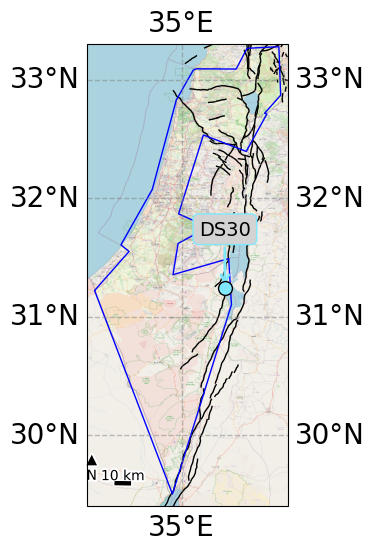

In [104]:
fig = plt.figure(figsize=(6, 6))

axa= plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Initialize OpenStreetMap tiles
osm = img_tiles.OSM()

# Add OpenStreetMap tiles to the plot
axa.add_image(osm, 10)  # Zoom level of 8 
axa.set_extent(Israel_extent, crs=ccrs.PlateCarree())
axa.add_geometries(gdf_Asia.geometry, crs=ccrs.PlateCarree(), edgecolor='black', facecolor="none")
shapefile_countries = natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
for country in Reader(shapefile_countries).records():
    country_name = country.attributes['NAME']
    if country_name == 'Israel':
        axa.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='blue', facecolor='none', linewidth=1)



show_labels=True
gl = axa.gridlines(draw_labels=show_labels, linewidth=1, color='gray', alpha=0.5, linestyle='--')

if show_labels:
    gl.xlabel_style = {'size': 20}
    gl.ylabel_style = {'size': 20}

    # Get the rounded extent values for longitude (x) and latitude (y)
    lon_min, lon_max = np.round(EAF_extent[0], 1), np.round(EAF_extent[1], 1)
    lat_min, lat_max = np.round(EAF_extent[2], 1), np.round(EAF_extent[3], 1)

    # Determine a reasonable interval for longitude (x-axis)
    lon_range = abs(lon_max - lon_min)
    if lon_range <= 0.5:
        lon_step = 0.1
    elif lon_range <= 1:
        lon_step = 0.2
    elif lon_range <=2:
        lon_step = 0.5
    else:
        lon_step = 1.0

    # Determine a reasonable interval for latitude (y-axis)
    lat_range = abs(lat_max - lat_min)
    if lat_range <= 0.5:
        lat_step = 0.1
    elif lat_range <= 1:
        lat_step = 0.2
    elif lat_range <=2:
        lat_step = 0.5
    else:
        lat_step = 1.0

    # Apply MultipleLocator to both axes
    gl.xlocator = mticker.MultipleLocator(lon_step)
    gl.ylocator = mticker.MultipleLocator(lat_step)

else:
    gl.xlabels_top = False
    gl.xlabels_bottom = False
    gl.ylabels_left = False
    gl.ylabels_right = False
shift='vertical'

for i in range(len(DSF)):
    face_color = rgb2hex(colours[2])
    # Default xytext offset
    if shift == 'horizontal':
        # Adjust xytext for specific creepmeter abbreviations
        xytext_lon = DSF['Longitude'].iloc[i] + 0.5
        xytext_lat = DSF['Latitude'].iloc[i]
    if shift == 'vertical':
        xytext_lon = DSF['Longitude'].iloc[i] 
        xytext_lat = DSF['Latitude'].iloc[i]+0.5
        if RID['Creepmeter_abbrv'].iloc[i] in ['WSZ1']:
            xytext_lon = DSF['Longitude'].iloc[i]
            xytext_lat = DSF['Latitude'].iloc[i]-0.05
        
        
    
    axa.annotate(
        DSF['Creepmeter_abbrv'].iloc[i], 
        xy=(DSF['Longitude'].iloc[i], DSF['Latitude'].iloc[i]),
        xytext=(xytext_lon, xytext_lat), 
        arrowprops=dict(facecolor=face_color, edgecolor = face_color, arrowstyle='->', lw=2),
        bbox=dict(boxstyle='round,pad=0.3', edgecolor=face_color, facecolor='lightgrey'),
        fontsize=14, ha='center', va='center',
        transform=ccrs.PlateCarree()  # Make sure coordinates are correct
    )
    # Scatter points for creepmeters
    axa.scatter(
        DSF['Longitude'].iloc[i], 
        DSF['Latitude'].iloc[i], 
        color=face_color, 
        edgecolor='black', 
        s=100, 
        zorder=100, 
        transform=ccrs.Geodetic()
    )
scale_bar(axa, ccrs.PlateCarree(), 10)
#plt.savefig('Pakistan_map.pdf')
plt.show()

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_57804/1154903268.py:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter(dur_med,disp_med,s=len(instrument_df),c=colours[i],alpha=0.5)
/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_57804/1154903268.py:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv)


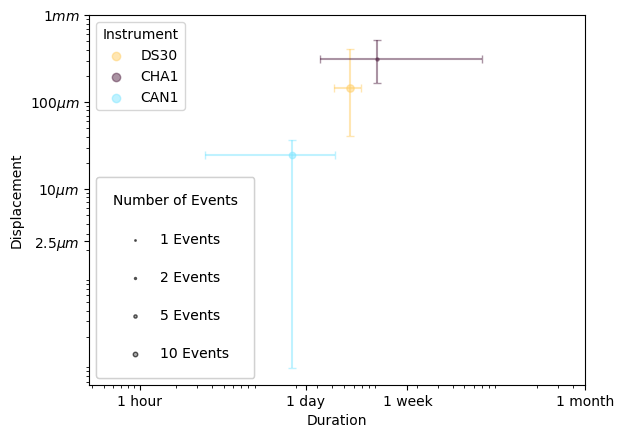

In [99]:
plt.figure()
axis = plt.subplot(1,1,1)


axis.set_xlabel('Duration')
axis.set_ylabel('Displacement')
axis.set_xscale('log')
axis.set_yscale('log')

instrument_dataframe = pd.concat([DSF,CHAF,UTA])



colours  = cmap(np.linspace(0, 1, len(instrument_dataframe)))
for i in range(len(instrument_dataframe)):
    abbrv = instrument_dataframe['Creepmeter_abbrv'].iloc[i]
    colours  = cmap(np.linspace(0, 1, len(instrument_dataframe)))
    #print(abbrv)
    try:
        instrument_df = df_all[df_all['Creepmeter_abbrv'] == abbrv]
        #print(len(instrument_df))
        displacement = instrument_df['Displacement, mm']
        duration = instrument_df['Duration, hrs']
        dur_med = np.median(duration)
        dur85 = np.percentile(duration,85)
        dur15 = np.percentile(duration,15)
        disp_med = np.median(displacement)
        disp85 = np.percentile(displacement,85)
        disp15 = np.percentile(displacement,15)


        # Asymmetric error bars
        xerr = [[dur_med-dur15], [dur85-dur_med]]
        yerr = [[disp_med-disp15], [disp85-disp_med]]
        
        axis.errorbar(dur_med, disp_med, xerr=xerr, yerr=yerr, fmt='none', ecolor=colours[i], alpha=0.5, capsize=3)
        axis.scatter(dur_med,disp_med,s=len(instrument_df),c=colours[i],alpha=0.5)
        axis.scatter([],[],c=colours[i],alpha=0.5,label=abbrv)
    

    except IndexError:
        print('no events')


# First legend (Color & Marker Style) - Automatically created by seaborn/matplotlib
legend1 = plt.legend(title="Instrument", loc="upper left", frameon=True)

# Define representative event counts for the size legend
size_legend_values = [1, 2, 5, 10]  # Adjust as needed
size_legend_labels = [f'{val} Events' for val in size_legend_values]


# Create properly sized legend markers
size_legend_handles = [
    axis.scatter([], [], s=size, color='gray', label=label, alpha=0.6, edgecolors='k')
    for size, label in zip(size_legend_values, size_legend_labels)]
if instrument_dataframe['Network'].iloc[0] in ['HAY', 'NAF','DSF']:
    # Second legend (Event Sizes)
    if instrument_dataframe['Network'].iloc[0] =='HAY':
        loc = 'lower left'
    else:
        loc = 'lower right'
    legend2 = plt.legend(
        handles=size_legend_handles, title='Number of Events',
        loc='lower left', frameon=True, labelspacing=1.75, borderpad=1.2, scatterpoints=1
    )
    plt.gca().add_artist(legend2)  # Add the second legend

# Add both legends
plt.gca().add_artist(legend1)  # Keep the first legend

# Set custom tick positions
axis.set_xticks([1, 24, 168,5040])
axis.set_yticks([0.0025,0.01,0.1,1])
# Set custom labels
axis.set_xticklabels(['1 hour', '1 day', '1 week','1 month'])
axis.set_yticklabels([r'2.5$\mu m$', r'10$\mu m$', r'100$\mu m$',r'1$mm$'])
plt.show()

#011959 #185562 #577647 #b38e2f #fba689 #faccfa


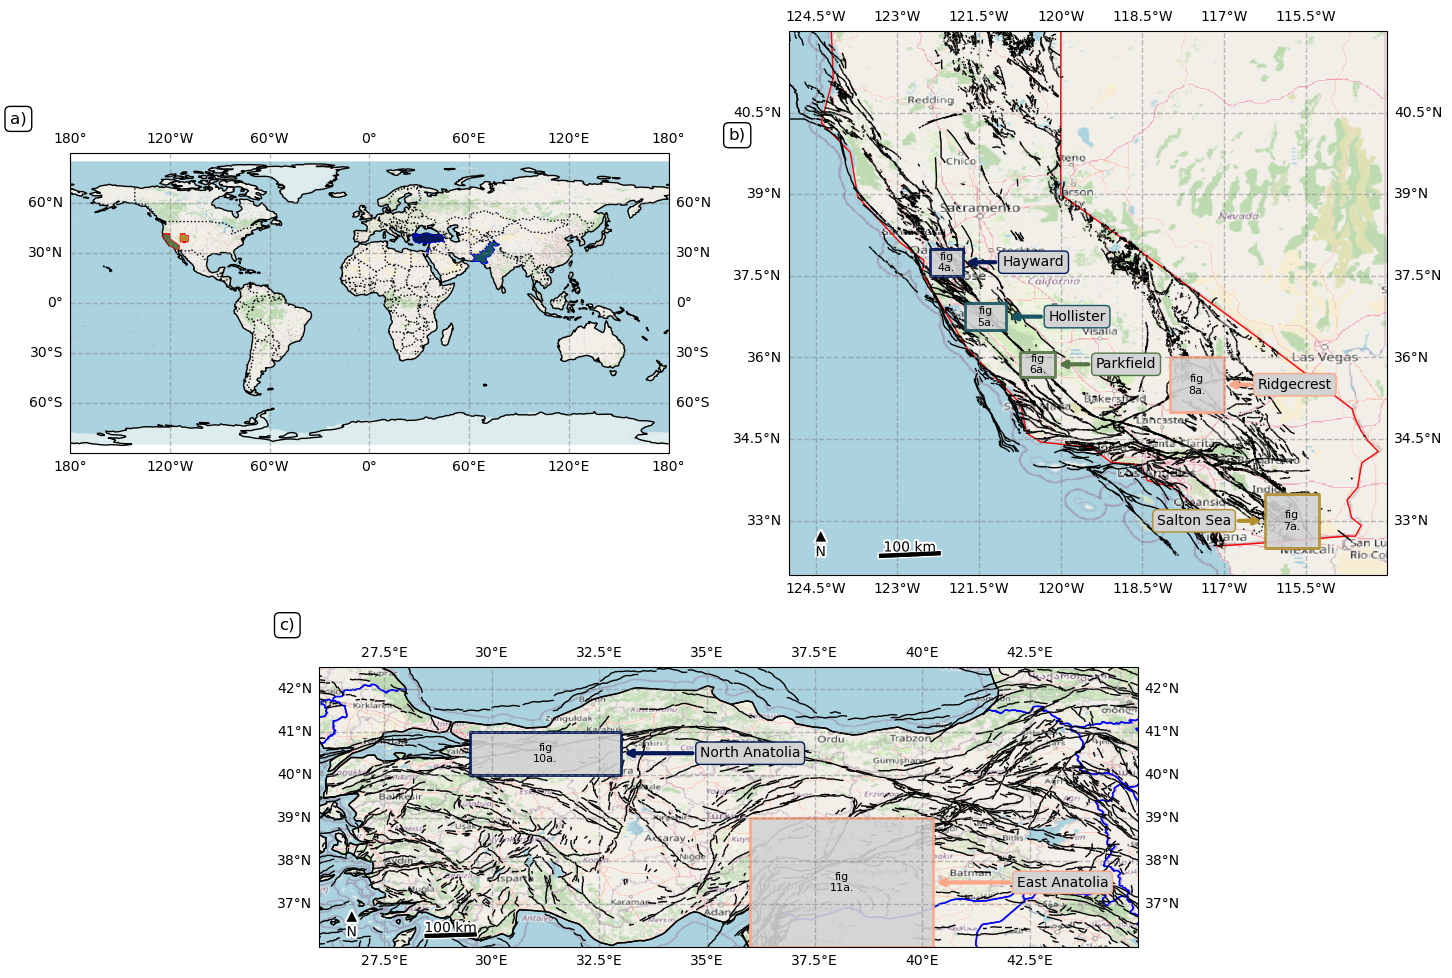

In [ ]:


fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 0.5])  # Set height ratios as needed

# First row: two side-by-side plots
ax_left = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
ax_right = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())

# Second row: single centered plot
ax1 = fig.add_subplot(gs[1, :], projection=ccrs.PlateCarree())


# Adjust space between subplots
plt.subplots_adjust(wspace=0.2)

# Load the Natural Earth data for country boundaries
shapefile_countries = natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
shapefile_states = natural_earth(resolution='110m', category='cultural', name='admin_1_states_provinces')

# Add labels to the subplots
fig.text(-0.1, 1.1, 'a)', transform=ax_left.transAxes, fontsize=12,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
ax_right.text(-0.1, 0.8, 'b)', transform=ax_right.transAxes, fontsize=12,
              bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
fig.text(-0.85, -0.1, 'c)', transform=ax_right.transAxes, fontsize=12,
              bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# --------------------------- Left Panel (World Map) --------------------------- #
osm = img_tiles.OSM()
ax_left.add_image(osm, 6)
ax_left.coastlines()
ax_left.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')
slicedCM = cmap(np.linspace(0,1,6))
print(rgb2hex(slicedCM[0]),rgb2hex(slicedCM[1]),rgb2hex(slicedCM[2]),rgb2hex(slicedCM[3]),rgb2hex(slicedCM[4]),rgb2hex(slicedCM[5]))
# Highlight specific countries on the map
for country in Reader(shapefile_countries).records():
    country_name = country.attributes['NAME']
    if country_name == 'Turkey':
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='blue', facecolor=slicedCM[0], linewidth=0.5)
    elif country_name == 'Pakistan':
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='blue', facecolor=slicedCM[1], linewidth=0.5)
    elif country_name =='Israel':
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='blue', facecolor=slicedCM[4], linewidth=0.5)
    else:
        ax_left.add_geometries([country.geometry], ccrs.PlateCarree(), edgecolor='none', facecolor='none', linewidth=0.5)

# Highlight California in the world map
for state in Reader(shapefile_states).records():
    state_name = state.attributes['name']
    country_code = state.attributes['adm0_a3']
    if state_name == 'California' and country_code == 'USA':
        ax_left.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='red', facecolor=slicedCM[2], linewidth=0.5)
    elif state_name == 'Utah' and country_code == 'USA':
        ax_left.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='red', facecolor=slicedCM[3], linewidth=0.5)
    else:
        ax_left.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='none', facecolor='none', linewidth=0.5)
    

ax_left.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax_left.set_global()

# ------------------------- Right Panel (California Only) ------------------------- #
ax_right.set_extent([-125.0, -114.0, 32.0, 42.0])

osm = img_tiles.OSM()
ax_right.add_image(osm, 6)


# Fill California with beige
for state in Reader(shapefile_states).records():
    state_name = state.attributes['name']
    country_code = state.attributes['adm0_a3']
    if state_name == 'California' and country_code == 'USA':
        ax_right.add_geometries([state.geometry], ccrs.PlateCarree(), edgecolor='red', facecolor='none', linewidth=1)


ax1.coastlines(resolution='50m')
ax1.add_feature(cfeature.BORDERS, edgecolor='blue', linewidth=1)
# Add Fault geometries
ax_right.add_geometries(gdf_Cali.geometry, crs = ccrs.PlateCarree(),edgecolor='black', facecolor="none")

# Define colors and labels for regions
regions = {
    'Hayward': {'coords': dict(left=-122.4, bottom=37.5, right=-121.8, top=38), 'color': slicedCM[0], 'label': 'fig\n4a.'},
    'Hollister': {'coords': dict(left=-121.75, bottom=36.5, right=-121.0, top=37.0), 'color': slicedCM[1], 'label': 'fig\n5a.'},
    'Parkfield': {'coords': dict(left=-120.75, bottom=35.65, right=-120.1, top=36.1), 'color': slicedCM[2], 'label': 'fig\n6a.'},
    'Salton Sea': {'coords': dict(left=-116.25, bottom=32.5, right=-115.25, top=34), 'color': slicedCM[3], 'label': 'fig\n7a.'},
    'Ridgecrest': {'coords': dict(left=-118, bottom=35.2, right=-117, top=35.8), 'color': slicedCM[4], 'label': 'fig\n8a.'}
}


label_distance = 1.3  # Distance from the box for text labels
text_box_color = 'lightgrey'
alpha_inner = 0.9  # Alpha for the inner box

# Loop through each region to create bounding boxes and annotations
for region, props in regions.items():
    coords = props['coords']
    color = props['color']
    label = props['label']

    # Create and add bounding box
    bbox = box(coords['left'], coords['bottom'], coords['right'], coords['top'])
    ax_right.add_geometries([bbox], ccrs.PlateCarree(), edgecolor=color, facecolor='lightgrey', linestyle='-', linewidth=2, alpha=alpha_inner)

    # Calculate label position
    label_y = (coords['top'] + coords['bottom']) / 2
    label_x = coords['right'] + label_distance if region != 'Salton Sea' else coords['left'] - label_distance

    # Add annotation
    ax_right.annotate(region, 
                      xy=(coords['right'] if region != 'Salton Sea' else coords['left'], label_y),
                      xytext=(label_x, label_y),
                      arrowprops=dict(facecolor=color,edgecolor=color, arrowstyle='->', lw=3),
                      bbox=dict(boxstyle='round,pad=0.3', edgecolor=color, facecolor=text_box_color),
                      fontsize=10, ha='center', va='center')

    # Add text inside the bounding box
    box_x_center = (coords['left'] + coords['right']) / 2
    ax_right.text(box_x_center, label_y, label, fontsize=8, ha='center', va='center', color='black')

scale_bar(ax_right, ccrs.PlateCarree(), 100)
ax_right.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

# --------------------------- Turkey ------------------------------------- #
turkiye_extent = [26.0, 45.0, 36.0, 42.5]
# Create an instance of GoogleTiles
# google_tiles = img_tiles.GoogleTiles(style='satellite')
# Add the Google Tiles to the axis with a lower zoom level
# ax1.add_image(google_tiles, 10)
ax1.set_extent(turkiye_extent)
# Initialize OpenStreetMap tiles
osm = img_tiles.OSM()
ax1.add_image(osm, 6)  # Zoom level of 8  


extent = turkiye_extent
 # Add coastlines and other features if desired
ax1.coastlines(resolution='50m')
ax1.add_feature(cfeature.BORDERS, edgecolor='blue', linewidth=1)


# Add Fault geometries
ax1.add_geometries(gdf_Cali.geometry, crs = ccrs.PlateCarree(),edgecolor='black', facecolor="none")
ax1.add_geometries(gdf_Asia.geometry, crs = ccrs.PlateCarree(),edgecolor='black', facecolor="none")
# Define box colours
# Define colors and labels for regions
regions = {
    'North Anatolia': {'coords': dict(left=29.5, bottom=40.4, right=33.1, top=41.1), 'color': slicedCM[0], 'label': 'fig\n10a.'},
    'East Anatolia': {'coords': dict(left=36, bottom=36, right=40.25, top=39), 'color': slicedCM[4], 'label': 'fig\n11a.'},
}
label_distance = 3  # Distance from the box for text labels
text_box_color = 'lightgrey'
alpha_inner = 0.9  # Alpha for the inner box

# Loop through each region to create bounding boxes and annotations
for region, props in regions.items():
    coords = props['coords']
    color = props['color']
    label = props['label']

    # Create and add bounding box
    bbox = box(coords['left'], coords['bottom'], coords['right'], coords['top'])
    ax1.add_geometries([bbox], ccrs.PlateCarree(), edgecolor=color, facecolor='lightgrey', linestyle='-', linewidth=2, alpha=alpha_inner)

    # Calculate label position
    label_y = (coords['top'] + coords['bottom']) / 2
    label_x = coords['right'] + label_distance if region != 'Salton Sea' else coords['left'] - label_distance

    # Add annotation
    ax1.annotate(region, 
                      xy=(coords['right'] if region != 'Salton Sea' else coords['left'], label_y),
                      xytext=(label_x, label_y),
                      arrowprops=dict(facecolor=color,edgecolor=color, arrowstyle='->', lw=3),
                      bbox=dict(boxstyle='round,pad=0.3', edgecolor=color, facecolor=text_box_color),
                      fontsize=10, ha='center', va='center')

    # Add text inside the bounding box
    box_x_center = (coords['left'] + coords['right']) / 2
    ax1.text(box_x_center, label_y, label, fontsize=8, ha='center', va='center', color='black')

scale_bar(ax1, ccrs.PlateCarree(), 100)
ax1.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
# --------------------------- Display the Plot --------------------------- #
fig.set_size_inches(17, 12)
#plt.savefig("../../Creep_catalog_stats_figures/Creepmeter_locations_world_updated_12_FEB_25.pdf")
plt.show()
